In [1]:
"""
In this notebook i try different combinations SVD parameters.

1st load 17 topics and tried 1000,100 features 
2nd load  4 topics and tried 1000,100,10 features 
There is also a visualization of these groups in 2D

"""
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import umap
import matplotlib.pyplot as plt

import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


#dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))

def clean_document(docs):
  cleaned_docs = []
  for doc in docs:
    doc_clean = doc.replace("[^a-zA-Z#]", " ")
    doc_clean = ' '.join([w for w in doc_clean.split() if len(w)>3 and w not in stop_words ])
    doc_clean = doc_clean.lower()
    cleaned_docs.append( doc_clean )
  return cleaned_docs

def fit_SVD(x_orig,max_features,n_components):
  vectorizer = TfidfVectorizer(stop_words='english', max_features= max_features, max_df = 0.5, smooth_idf=True)
  X = vectorizer.fit_transform(x_orig)

  print("X data shape ",X.shape)

  # SVD represent documents and terms in vectors 
  svd_model = TruncatedSVD(n_components=n_components, algorithm='randomized', n_iter=100, random_state=122)

  svd_model.fit(X)
  X_proj = svd_model.transform(X)
  explained_variances = np.var(X_proj, axis=0) / np.var( [a.todense() for a in X] ).sum()
  print("explained variances manual calculation ",explained_variances)
  print("explained variance_ratio_ ",svd_model.explained_variance_ratio_) 
  
  print("X_proj shape",X_proj.shape)
  terms = vectorizer.get_feature_names()
  for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    print(" ".join([t[0]+"->"+str(round(t[1],2)) for t in sorted_terms]) )
  
  return X,X_proj

def draw_umap(data_transformed,targets):

  embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(data_transformed)

  plt.figure(figsize=(7,5))
  plt.scatter(embedding[:, 0], embedding[:, 1], 
  c = targets,
  s = 10, # size
  edgecolor='none'
  )
  plt.show()  






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
cats = [
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x', 
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
topic17_set = fetch_20newsgroups(subset='train',shuffle=True,  categories=cats,remove=('headers', 'footers', 'quotes'))

documents = topic17_set.data
print("documents ",len(documents))
cleaned_document = clean_document(topic17_set.data)
pd.DataFrame(cleaned_document).head(10)

documents  9650


,0
0,there many injustices middle ages. truely sad....
1,this actually supports bill's speculation back...
2,applied engineering makes nubus card called qu...
3,mark mcwiggins <markmc@halcyon.com> reminds al...
4,"excellently put! even libertarian, admit gover..."
5,someone please help understand current situati...
6,could anyone tell possible save frame (grasp) ...
7,"...and ""fantasy"" begins... this clearly ""fanta..."
8,"[the original question started fire whether ""m..."
9,486dx-33 computer soundblaster card. running m...


X data shape  (9650, 1000)
explained variances manual calculation  [5.35007576 9.42432517 6.50213916 5.99732152 5.69963676 5.39045933
 4.98916369 4.79685083 4.63371396 4.3984132  4.37982968 4.29132512
 4.09320226 4.02926961 3.90321421 3.83089951 3.73772711]
explained variance_ratio_  [0.00539591 0.00950507 0.00655785 0.00604871 0.00574847 0.00543664
 0.00503191 0.00483795 0.00467342 0.0044361  0.00441736 0.00432809
 0.00412827 0.00406379 0.00393666 0.00386372 0.00376975]
X_proj shape (9650, 17)
Topic 0: 
like->0.21 know->0.2 people->0.18 think->0.17 good->0.15 time->0.14 thanks->0.12 ve->0.12 right->0.11 make->0.11
Topic 1: 
thanks->0.33 windows->0.3 file->0.16 card->0.16 advance->0.13 mail->0.13 files->0.13 does->0.13 drive->0.12 know->0.12
Topic 2: 
game->0.37 team->0.34 year->0.26 games->0.22 season->0.18 players->0.17 play->0.15 good->0.14 hockey->0.14 thanks->0.13
Topic 3: 
edu->0.46 thanks->0.29 mail->0.17 know->0.17 com->0.13 does->0.1 advance->0.1 email->0.09 information->0.09 

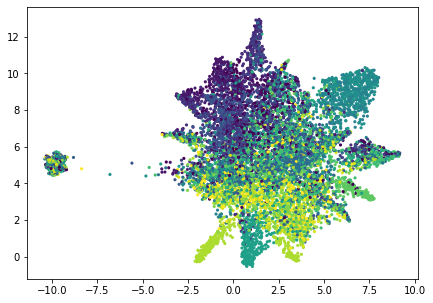

In [3]:
#There are 17 topics but infact they are 4 science, 4politics,5 computer so not all 17 are distinguishable
X,X_projected = fit_SVD(cleaned_document,max_features=1000,n_components=17,)    
draw_umap(X_projected,topic17_set.target)

X data shape  (9650, 1000)
explained variances manual calculation  [5.35007576 9.42432517 6.50213916 5.99732152]
explained variance_ratio_  [0.00539591 0.00950507 0.00655785 0.00604871]
X_proj shape (9650, 4)
Topic 0: 
like->0.21 know->0.2 people->0.18 think->0.17 good->0.15 time->0.14 thanks->0.12 ve->0.12 right->0.11 make->0.11
Topic 1: 
thanks->0.33 windows->0.3 file->0.16 card->0.16 advance->0.13 mail->0.13 files->0.13 does->0.13 drive->0.12 know->0.12
Topic 2: 
game->0.37 team->0.34 year->0.26 games->0.22 season->0.18 players->0.17 play->0.15 good->0.14 hockey->0.14 thanks->0.13
Topic 3: 
edu->0.46 thanks->0.29 mail->0.17 know->0.17 com->0.13 does->0.1 advance->0.1 email->0.09 information->0.09 soon->0.09


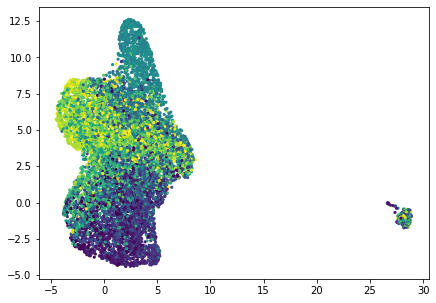

In [4]:
#There are 17 topics but infact they are forming 4 big groups.
X,X_projected = fit_SVD(cleaned_document,max_features=1000,n_components=4,)    
draw_umap(X_projected,topic17_set.target)

X data shape  (9650, 100)
explained variances manual calculation  [1.9474714  2.74650753 2.29459057 2.22637381 2.14678605 2.08324391
 1.95996844 1.791607   1.68804071 1.59475831 1.56165589 1.55604836
 1.54461218 1.4772296  1.42252305 1.41207542 1.39014371]
explained variance_ratio_  [0.01973673 0.0278346  0.02325462 0.02256328 0.02175669 0.02111272
 0.01986338 0.01815712 0.01710752 0.01616214 0.01582667 0.01576984
 0.01565394 0.01497105 0.01441662 0.01431074 0.01408847]
X_proj shape (9650, 17)
Topic 0: 
like->0.33 know->0.28 people->0.27 think->0.25 good->0.2 time->0.2 make->0.15 right->0.15 ve->0.14 want->0.14
Topic 1: 
thanks->0.43 know->0.29 edu->0.24 windows->0.23 does->0.17 mail->0.16 help->0.13 file->0.13 card->0.12 program->0.11
Topic 2: 
like->0.86 know->0.03 does->0.03 look->0.03 things->0.02 really->0.02 game->0.02 sure->0.01 team->0.01 going->0.0
Topic 3: 
edu->0.77 like->0.32 com->0.06 1993->0.05 mail->0.04 send->0.03 available->0.03 file->0.03 version->0.02 team->0.02
Topi

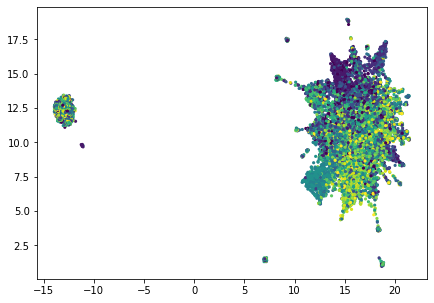

In [5]:
X,X_projected = fit_SVD(cleaned_document,max_features=100,n_components=17,)    
draw_umap(X_projected,topic17_set.target)

In [6]:
cats = [
 'comp.os.ms-windows.misc',
 'rec.sport.hockey',
 'sci.space',
 'talk.politics.guns',]
topic4_set = fetch_20newsgroups(subset='train', categories=cats)

documents = topic4_set.data
print("documents ",len(documents))
cleaned_document = clean_document(topic4_set.data)
pd.DataFrame(cleaned_document).head(10)

documents  2330


,0
0,subject: cornerstone dualpage driver wanted fr...
1,from: dpiaseck@jarthur.claremont.edu (derek pi...
2,from: uphrrmk@gemini.oscs.montana.edu (jack co...
3,from: rruther@watts.tansu.com.au (ralf rutherf...
4,from: etxonss@ufsa.ericsson.se (staffan axelss...
5,from: jim.wray@yob.sccsi.com (jim wray) subjec...
6,from: pyron@skndiv.dseg.ti.com (dillon pyron) ...
7,from: david fuess subject: visual organization...
8,from: gballent@hudson.uvic.ca (greg ballentine...
9,from: gaucher@sam.cchem.berkeley.edu subject: ...


X data shape  (2330, 1000)
explained variances manual calculation  [ 3.50508989 18.4840405  16.9975337  14.54524808]
explained variance_ratio_  [0.00357492 0.01885228 0.01733615 0.01483502]
X_proj shape (2330, 4)
Topic 0: 
com->0.26 windows->0.21 space->0.16 ca->0.15 article->0.15 like->0.14 university->0.13 people->0.12 posting->0.12 host->0.12
Topic 1: 
windows->0.56 file->0.21 files->0.15 drivers->0.11 driver->0.11 card->0.1 access->0.1 ms->0.1 mouse->0.09 using->0.09
Topic 2: 
space->0.4 nasa->0.32 gov->0.18 alaska->0.13 access->0.13 moon->0.12 digex->0.12 henry->0.11 shuttle->0.1 orbit->0.09
Topic 3: 
com->0.34 stratus->0.19 guns->0.17 people->0.17 batf->0.13 gun->0.11 cdt->0.11 weapons->0.11 government->0.11 sw->0.11


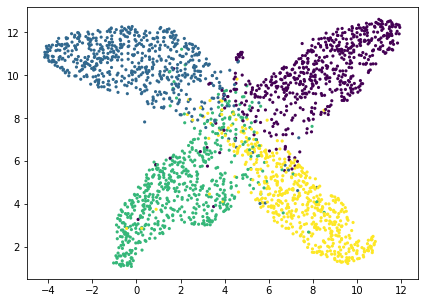

In [7]:
X,X_projected = fit_SVD(cleaned_document,max_features=1000,n_components=4)    
draw_umap(X_projected,topic4_set.target)

X data shape  (2330, 100)
explained variances manual calculation  [1.24589597 5.44021654 5.05214956 4.39759195]
explained variance_ratio_  [0.01311163 0.05725205 0.05316808 0.04627962]
X_proj shape (2330, 4)
Topic 0: 
com->0.41 article->0.23 windows->0.23 posting->0.2 ca->0.2 university->0.19 like->0.19 nntp->0.19 host->0.19 space->0.17
Topic 1: 
windows->0.62 com->0.24 file->0.17 files->0.12 thanks->0.1 access->0.1 using->0.1 program->0.09 problem->0.08 help->0.06
Topic 2: 
windows->0.52 ca->0.38 university->0.19 team->0.14 file->0.14 game->0.14 hockey->0.13 thanks->0.1 files->0.09 play->0.08
Topic 3: 
space->0.71 nasa->0.41 gov->0.27 launch->0.1 program->0.09 data->0.08 university->0.06 high->0.06 software->0.05 work->0.05


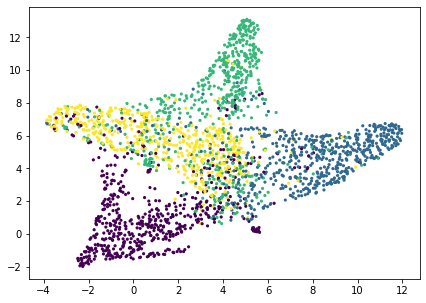

In [8]:
X,X_projected = fit_SVD(cleaned_document,max_features=100,n_components=4)    
draw_umap(X_projected,topic4_set.target)

X data shape  (2330, 10)
explained variances manual calculation  [0.57593138 2.52300127 1.45022428 1.26501681]
explained variance_ratio_  [0.06925066 0.30336861 0.17437666 0.15210709]
X_proj shape (2330, 4)
Topic 0: 
com->0.58 article->0.44 university->0.44 posting->0.38 like->0.33 space->0.13 max->0.0 g9v->0.0 b8f->0.0 ax->0.0
Topic 1: 
com->0.73 max->0.0 ax->-0.0 b8f->-0.0 g9v->-0.0 space->-0.04 article->-0.08 like->-0.08 posting->-0.2 university->-0.64
Topic 2: 
like->0.73 space->0.36 article->0.22 max->0.0 ax->-0.0 b8f->-0.0 g9v->-0.0 posting->-0.05 com->-0.29 university->-0.45
Topic 3: 
space->0.88 article->0.09 university->0.02 com->0.01 max->0.0 ax->0.0 b8f->-0.0 g9v->-0.0 posting->-0.05 like->-0.45


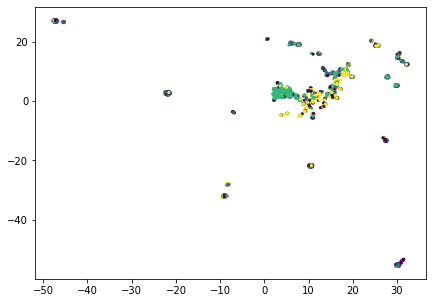

In [9]:
X,X_projected = fit_SVD(cleaned_document,max_features=10,n_components=4)    
draw_umap(X_projected,topic4_set.target)